# RUN5: 2018-05-26 UT Preliminary Analysis

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2018_05_26 as redu

reload(redu)
reload(plot_stats)

root_dir = "/Volumes/DATA5/imaka/20180526/FLI/"
root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN7/20180526/FLI/"
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Reduction

Fully reduce the data from 20180526 UT. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.


In [4]:
"""Set the appropriate root directory for your machine"""
redu.root_dir = root_dir

""""Make sky and flat images and use them to reduce science images"""
#redu.make_sky()
#redu.make_flat()  # Manually copy over flat from 20180525/
#redu.reduce_FLD2()

""""Find stars in clean images and calculate stats"""
#redu.find_stars_FLD2()
#redu.calc_star_stats()

""""Make a stack of images for each mode and analyze stacks"""
redu.stack_FLD2()
#redu.analyze_stacks()

PermissionError: [Errno 13] Permission denied: '//Volumes/DATA5'

# Generate Plots

# FWHM and Seeing

Towards the end of the night, it got pretty cloudy and the performance (of both 'imaka and the MASS/DIMM) likely suffered.

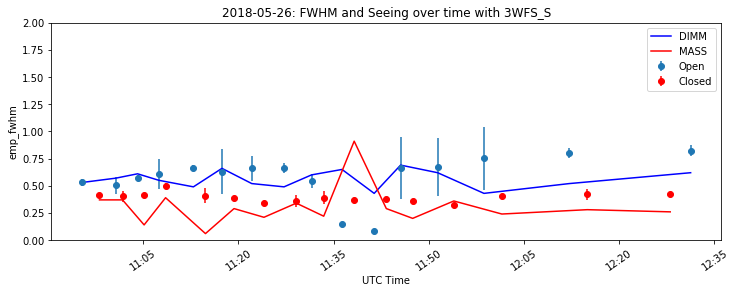

In [42]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_closed_3WFS_S_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-05-26: FWHM and Seeing over time with 3WFS_S", plots_dir)

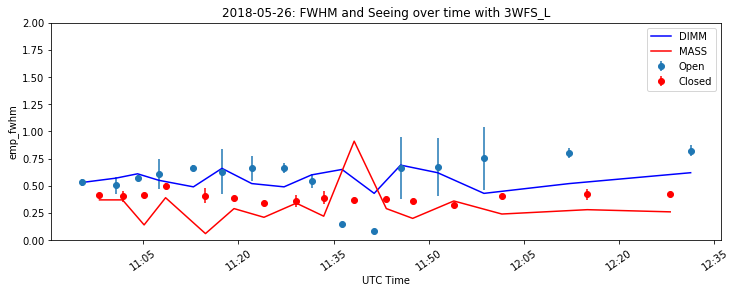

In [43]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_closed_3WFS_L_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-05-26: FWHM and Seeing over time with 3WFS_L", plots_dir)

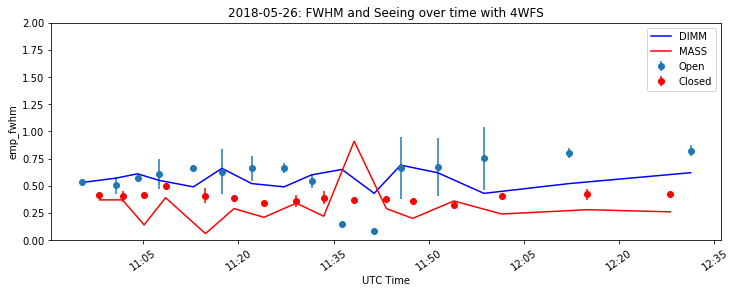

In [44]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file3 = stats_dir+ "stats_closed_4WFS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-05-26: FWHM and Seeing over time with 4WFS", plots_dir)

# PSF Comparisons


/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/moffat.py:259: RuntimeWarning: divide by zero encountered in true_divide
  sig_alpha_min = (alpha_min_std / np.sqrt(N_stars)) * np.sqrt((np.pi * N_stars) / (2 * (N_stars-1)))
/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/moffat.py:259: RuntimeWarning: invalid value encountered in multiply
  sig_alpha_min = (alpha_min_std / np.sqrt(N_stars)) * np.sqrt((np.pi * N_stars) / (2 * (N_stars-1)))
/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/moffat.py:260: RuntimeWarning: divide by zero encountered in true_divide
  sig_alpha_maj = (alpha_maj_std / np.sqrt(N_stars)) * np.sqrt((np.pi * N_stars) / (2 * (N_stars-1)))
/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/moffat.py:260: RuntimeWarning: invalid value encountered in multiply
  sig_alpha_maj = (alpha_maj_std / np.sqrt(N_stars)) * np.sqrt((np.pi * N_stars) / (2 * (N_stars-1)))
/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/an

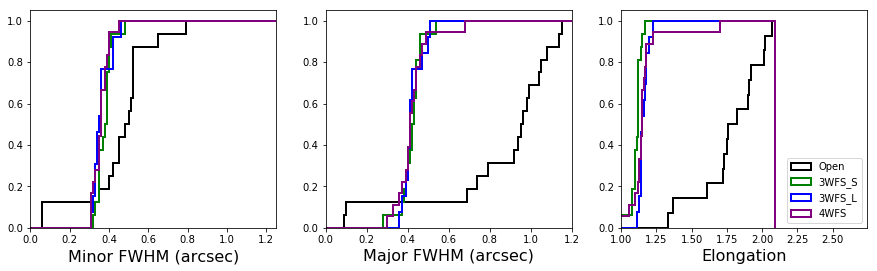

In [49]:
files = [open_file, closed_file1, closed_file2, closed_file3]
labels = ['Open', '3WFS_S', '3WFS_L', '4WFS']
colors = ['k', 'g', 'b', 'purple']
plot_stats.comp_cdf(files, labels, colors);

# PSF Variability over Field of View

Right panel shows the FWHM of sources as a function of position on image.  Sources on right have outliers removed by sigma clipping, with both the original and clipped data sets shown on the left panel.

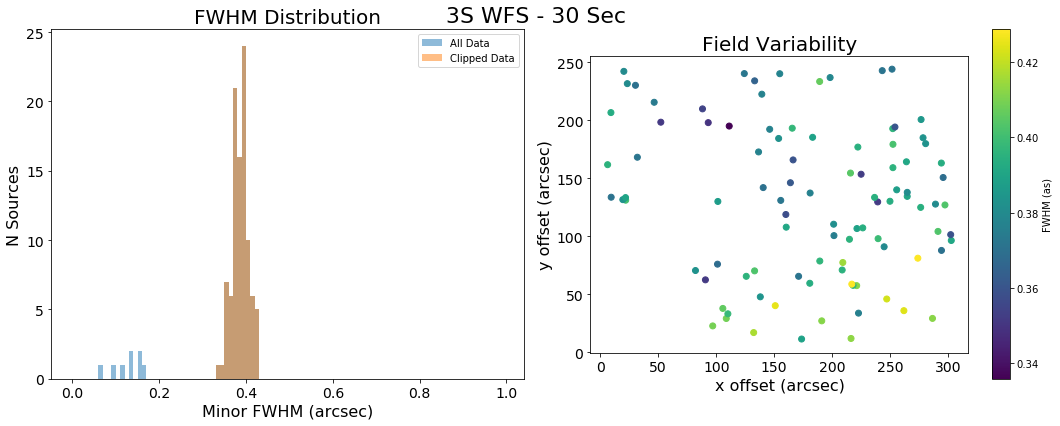

In [55]:
img_file = stack_dir + "FLD2_stack_closed_3S_30.fits"
starlist = stack_dir + "FLD2_stack_closed_3S_30_stars.txt"
plot_stats.plot_var(img_file, starlist, "3S WFS - 30 Sec")

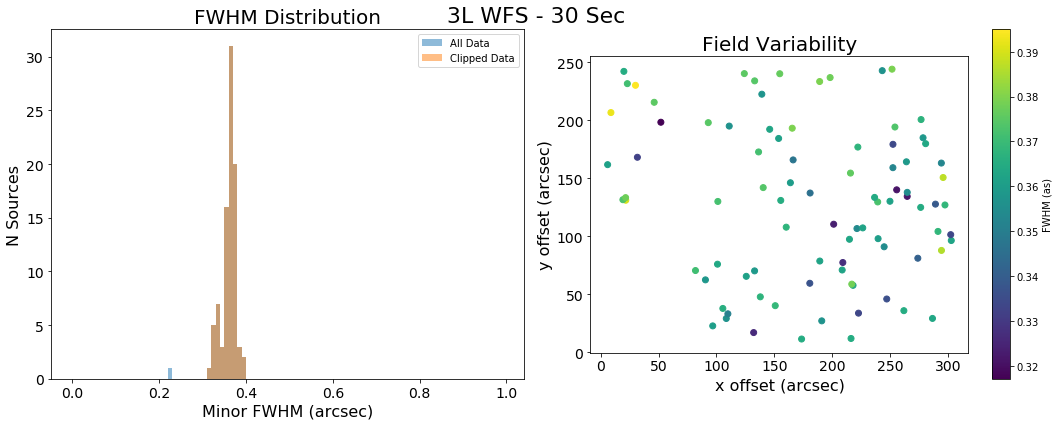

In [56]:
img_file = stack_dir + "FLD2_stack_closed_3L_30.fits"
starlist = stack_dir + "FLD2_stack_closed_3L_30_stars.txt"
plot_stats.plot_var(img_file, starlist, "3L WFS - 30 Sec")

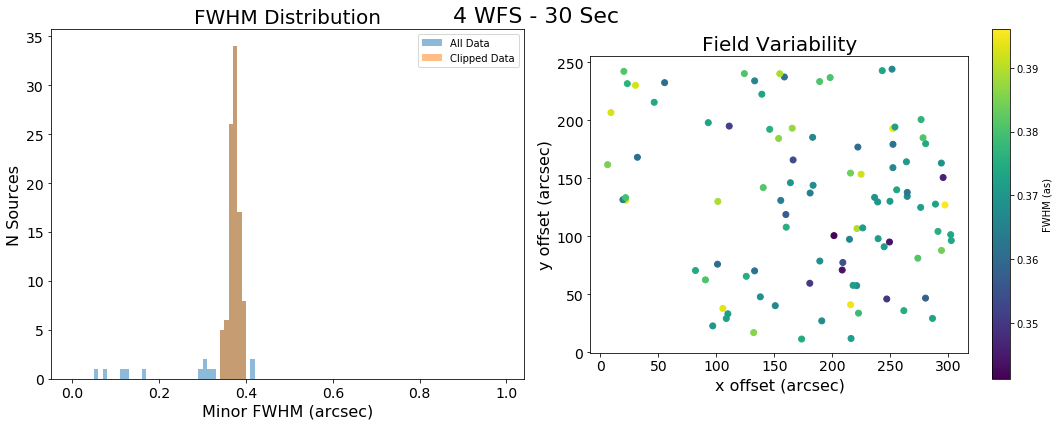

In [57]:
img_file = stack_dir + "FLD2_stack_closed_4_30.fits"
starlist = stack_dir + "FLD2_stack_closed_4_30_stars.txt"
plot_stats.plot_var(img_file, starlist, "4 WFS - 30 Sec")

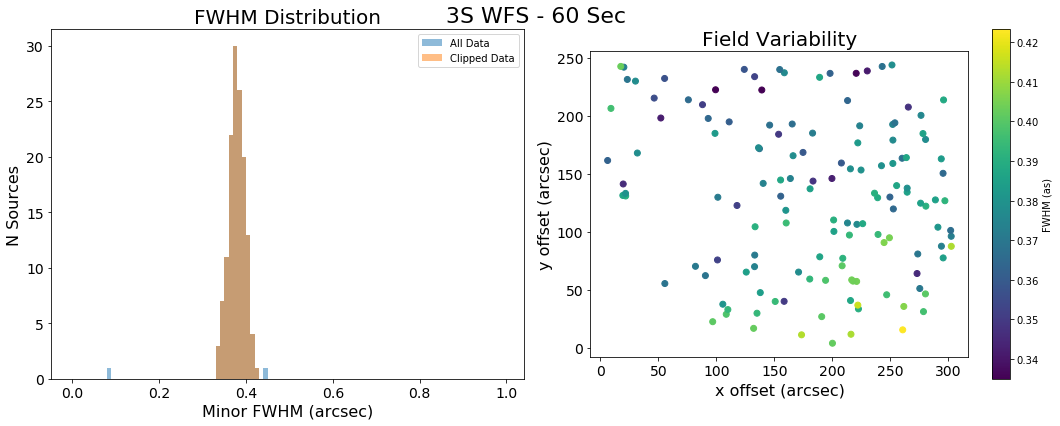

In [58]:
img_file = stack_dir + "FLD2_stack_closed_3S_60.fits"
starlist = stack_dir + "FLD2_stack_closed_3S_60_stars.txt"
plot_stats.plot_var(img_file, starlist, "3S WFS - 60 Sec")

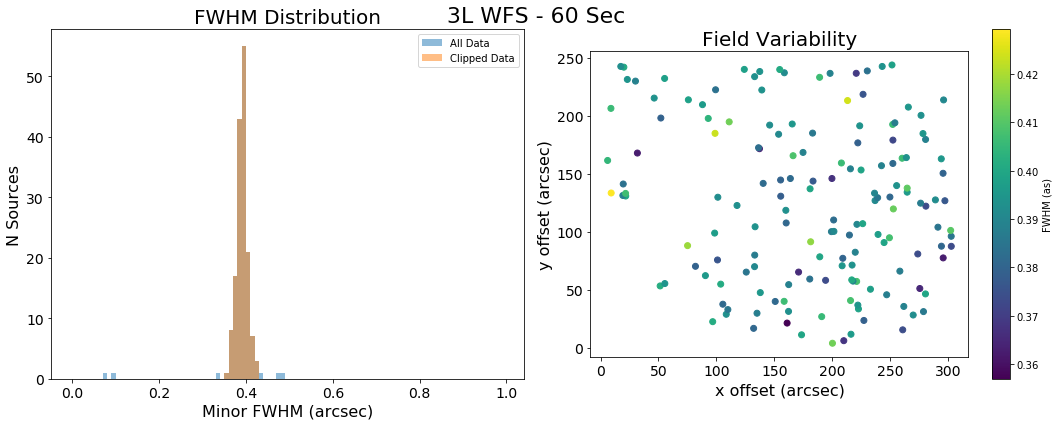

In [59]:
img_file = stack_dir + "FLD2_stack_closed_3L_60.fits"
starlist = stack_dir + "FLD2_stack_closed_3L_60_stars.txt"
plot_stats.plot_var(img_file, starlist, "3L WFS - 60 Sec")

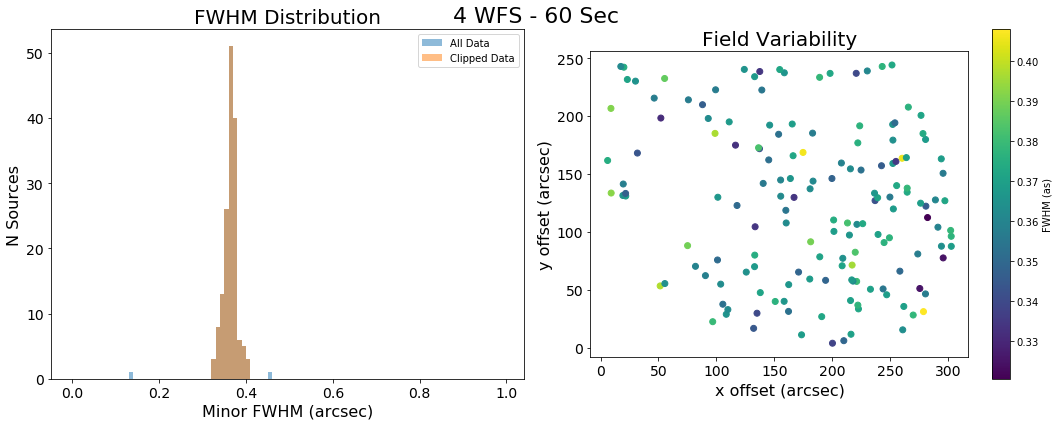

In [60]:
img_file = stack_dir + "FLD2_stack_closed_4_60.fits"
starlist = stack_dir + "FLD2_stack_closed_4_60_stars.txt"
plot_stats.plot_var(img_file, starlist, "4 WFS - 60 Sec")